Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Prof. Dr.-Ing. Johann-Markus Batke

**Date:** SS 2024



## Organisatorisches



Einige Anmerkungen zum reibungslosen Ablauf des Praktikums:

-   Geben Sie Ihr Notebook **vollständig** ab, d.h. es sind
    Vorbereitungsaufgaben und Praktikumsaufgaben im Notebook enthalten.

-   Nutzen Sie die Markdown-Zellen zur Dokumentation Ihrer Lösungen.

-   Sollten Sie vor Ablauf von Termin 4 fertig sein, zeigen Sie **vor**
    Abgabe einem der Betreuer Ihre Lösung. Ist alles in Ordnung, können
    Sie früher gehen.



## Vorbereitung



Die Vorbereitung muss zu Beginn des Praktikums erfolgt sein, damit eine flüssige Bearbeitung der Aufgaben während des Praktikums gewährleistet ist.  Die Ergebnisse der Vorbereitung in diesem Versuch sind in der Lösung mit abzugeben!



### Numpy-Sprachelemente



1.  Vergegenwärtigen Sie sich die Funktion der Numpy-array-Methoden `shape`, `reshape`, `ndim`, `size`.

2.  Welche Ausgabe ergibt folgender Programmtext? Was bedeuten die ausgegebenen Werte?



In [63]:
import numpy as np

Die Funktion `shape` gibt die Form der Matrix aus.

Die Funktion `reshape` formt einen Vektor in eine vorgegebene Matrixform.

Die Funktion `ndim` gibt aus welche Dimension die Matrix hat.

Die Funktion `size` gibt die Größe der Matrix aus

In [64]:
a = np.ones([3, 2, 2])
print(a.size)       #ausgabe der Größe der matrix. Hier 12 da die Matrix 12 Elemente enthält.
print(a.shape)      #ausgabe der Form der matrix. Hier (3, 2, 2) da die Matrix 3 Zeilen, 2 Spalten und 2 Ebenen hat.
print(a.ndim)       #ausgabe der Dimension der matrix. Hier 3 da die Matrix 3 Dimensionen hat (dies kann man auch an den Klammern ablesen).

12
(3, 2, 2)
3


<hr>

1.  Analysieren Sie die Ausgabe dieses Beispiels.  Welche Dimension hat `c`?



In [65]:
A = np.ones([3, 3])
b = np.ones([3,1])
c = A @ b
print(c)

[[3.]
 [3.]
 [3.]]


`c` hat 2 Dimensionen.


2. Dieser Versuch beschäftigt sich mit Methoden der linearen Algebra (also Rechnen mit Vektoren und Matrizen).  Erklären Sie diesbezüglich die Begriffe "elementweise Multiplikation", "Matrixmultiplikation", "inneres Produkt", "äußeres Produkt", "Skalarprodukt" und "Kreuzprodukt"!



Bei der Elementweisen Multiplikation werden die einzelnen Elemente eines Vektors oder einer Matrix miteinander multipliziert.

Bei der Matrixmultiplikation multipliziert man die Zeilen einer Matrix mit den Spalten einer anderen. 

Das Innere Produkt oder auch Skalarprodukt ist die Summe aus zwei Vektoren/Matrizen.

Das Äußere Produkt oder auch Kreuzprodukt ergibt einen Vektor der Orthogonal zu den Vektoren aus denen er berechnet wurde steht.

<hr>

### Berechnung einer Summe per Schleife



Die Berechnungsvorschrift 

s =$\sum\limits_{i=1}^{3}$ $a_i *b_i$

ergibt einen skalaren Wert $s$, viele Zusammenhänge der Signalverarbeitung werden über diese Summenschreibweise dargestellt. Zur Berechnung einer solchen Summe wird häufig eine Schleife programmiert.  Die Koeffizienten $a_i$ und $b_i$ lassen sich aber auch als Vektorelemente auffassen, damit lässt sich die Berechnung durch die lineare Algebra formulieren.

Verwenden Sie die Defintion der Variablen $\vec a$ und $\vec b$ der Form



In [66]:
loops = 3       #anzahl der loops setzen
s = 0           #s initialisieren und auf 0 setzen

a_N = np.arange(loops) + 1
b_N = np.arange(loops) + 2

und programmieren Sie die Berechnung für das Ergebnis $s$ wie oben angegeben per Schleife!



In [67]:
#for-schleife erstellen
for i in range (loops):
    s += a_N[i] * b_N[i] #s wird mit dem Produkt von a_N und b_N addiert

print("Der skalare Wert s =", s)

Der skalare Wert s = 20


<hr>

### Vektorielle Berechnung einer Summengleichung



Das innere Produkt zweier Vektoren $\vec a$ und $\vec b$ mit z.B. je 3 Elementen lautet:
$$
\vec{a} \cdot \vec{b}^T = 
\begin{pmatrix}
  a_1 & a_2 & a_3
\end{pmatrix}
\cdot
\begin{pmatrix}
  b_1 \\
  b_2 \\
  b_3
\end{pmatrix}
= a_1 b_1 + a_2 b_2 + a_3 b_3 = s
$$



Die Umsetzung einer solchen Operation wird durch *numpy* als Vektorprodukt realisierbar, ohne das eine Schleife implementiert werden muss.

Verwenden Sie die Definition von $\vec a$ und $\vec b$ wie oben angegeben und berechnen Sie das Ergebnis $s$ per Vektorprodukt!



In [68]:
print(np.inner(a_N, b_N)) #ausgabe des skalarprodukts durch numpy.inner

20


<hr>

### Zeitmessung



Um die Verarbeitungszeit in Python messen zu können, kann das Modul `time` verwendet werden. Folgendes Code-Beispiel verdeutlicht den Zusammenhang.



In [69]:
import time 
tic = time.time()
time.sleep(2)
toc = time.time()
print("Die Schlafenszeit beträgt " + str(toc-tic) + " Sekunden")

Die Schlafenszeit beträgt 2.001316547393799 Sekunden


Lassen Sie den Rechner nur noch eine Sekunde schlafen und modifizieren entsprechend den Quelltext!



In [70]:
tic = time.time()
time.sleep(1)
toc = time.time()
print("Die Schlafenszeit beträgt " + str(toc-tic) + " Sekunden")

Die Schlafenszeit beträgt 1.0008432865142822 Sekunden


<hr>

## Praktikum



In diesem Praktikum soll die Berechnung der DFT direkt bzw. mittels Matrix-Algebra in Python untersucht werden.



### Berechnung per Schleife



Die Definition der DFT lauten für eine periodische Folge $x[n]$ mit $n = 0\ldots N-1$ für die Rücktransformation

$$
\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \, e^{j \frac{2\pi}{N} k n}
\end{equation}
$$

wobei die DFT-Koeffizienten $X[k]$ bzgl. der Frequenzen $k$ mit $k = 0\ldots N-1$ nach

$$
\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N} k n}
\end{equation}
$$


berechnet werden können. 

Diese Gleichung bezeichnet man auch als Hintransformation.  Das Zeitsignal $x[n]$ ist periodisch, die Grundfrequenz des Signals beträgt $\frac{1}{N}$; d.h. die Periode einer Schwingung enthält $N$ Abtastwerte.  Schreiben Sie eine Python-Funktion `X = dft_schleife(x)`, die zum Vektor `x` die DFT-Koeffizienten `X` berechnet!

Beachten Sie dabei:

-   als Implementierung soll eine `for`-Schleife verwendet werden;
-   die Ordnung $N$ soll aus der Länge des Eingangsvektors bestimmt werden.



In [71]:
def dft_schleife(x):
    N = len(x)                                               #Länge des Eingabevektors
    X = np.zeros(N, dtype=np.complex_)                       #Initialisierung des Ausgabevektors
    for k in range(N):                                       #for-schleife erstellen                                                          
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2* np.pi / N * k * n)
    return X                                                 #Rückgabe des Ausgabevektors                                                                                                                      

print(dft_schleife(np.array([1, 2, 3, 4, 5, 6, 7])))         #print des Ausgabevektors


[28. +0.j         -3.5+7.26782489j -3.5+2.79115686j -3.5+0.79885216j
 -3.5-0.79885216j -3.5-2.79115686j -3.5-7.26782489j]


<hr>

### Berechnung per Matrix



Die Implementierung der DFT Hin- und Rücktransformation ist in Numpy einfach durch Bildung eines inneren Vektorprodukts umzusetzen. (Weitere Informationen zur Umsetzung finden sie im Buch Martin Werner (2012) "Digitale Signalverarbeitung mit MATLAB®", Springer Science + Business Media.)

Die Implementierung der DFT in diesem Versuch soll in der Form

$$
\begin{equation}
\vec{W} \, \vec{x} = \vec{X}
\end{equation}
$$


erfolgen, wobei ein $\vec W$ eine Matrix mit den Exponentialfunktionswerten $\mathrm e^{-\mathrm j 2\pi/N n k}$ mit $N$ Zeilen und $N$ Spalten darstellt und $\vec x$ die zu transformierende Folge $x(n)$ mit $n = 0\ldots N-1$ enthält.

Programmieren Sie alternativ eine Funktion `X = dft_vektor(x)` wobei die Berechnung wie oben dargestellt per Vektorprodukt vollzogen wird. Sie verwenden also keine `for`-Schleife, sondern die Exponentialfunktionswerte in einer Matrix wie in Gleichung [1](#org56ec6c1).



In [72]:
def dft_vektor(x):
    N = len(x)                                                 #Länge des Eingabevektors
    n = np.arange(N)                                           #Erstellen des arrays n
    k = n.reshape((N, 1))                                      #Erstellen des Vektors x(n)
    W = np.exp(-2j * np.pi / N * k * n)                        #Erstellen der Matrix W              
    return np.dot(W, x)                                        #Rückgabe des Ausgabevektors

print(dft_vektor(np.array([1, 2, 3, 4, 5, 6, 7])))             #print des Ausgabevektors

[28. +0.j         -3.5+7.26782489j -3.5+2.79115686j -3.5+0.79885216j
 -3.5-0.79885216j -3.5-2.79115686j -3.5-7.26782489j]


<hr>

### Berechnung der DFT



Erzeugen Sie eine cos-Folge mit der normierten Kreisfrequenz $\Omega_0 = \frac{4\pi}{N}$ für $N = 32$ Abtastpunkte $n = 0\ldots 31$.

1.  Stellen Sie diese Folge mit dem Befehl `stem` dar.

2.  Berechnen Sie die DFT und stellen Sie das Ergebnis mit Real- und
    Imaginärteil bzw. mit Betrag und Phase dar.  Verwenden Sie zur
    Berechnung der DFT die Befehle
    
    -   `dft_schleife`
    -   `dft_vektor`
    -   `np.fft.fft`
    
    Vergleichen Sie die Ergebnisse!

3.  Testen Sie die Performance Ihrer Implementierungen durch Messung
    der Verarbeitungszeit! Vergleichen Sie diese mit der
    Verarbeitungszeit der fft aus numpy!



<hr>

### 1. Aufgabe

Stellen Sie diese Folge mit dem Befehl `stem` dar.


<StemContainer object of 3 artists>

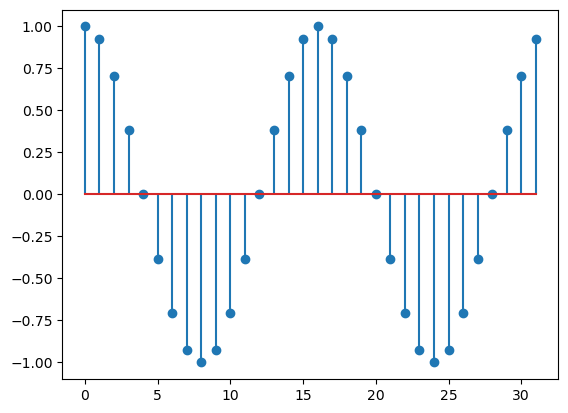

In [73]:
import matplotlib.pyplot as plt     #matplotlib importieren
N     = 32                          #Abtastpunkte-Variable setzen 
omega = 4*np.pi/N                   #Omega-Variable setzen
cos   = np.cos(omega*np.arange(N))  #Kosinusfunktion erstellen

plt.stem(cos)                       #Kosinusfunktion plotten       

<hr>

### 2. Aufgabe

Berechnen Sie die DFT und stellen Sie das Ergebnis mit Real- und
Imaginärteil bzw. mit Betrag und Phase dar.  Verwenden Sie zur
Berechnung der DFT die Befehle   
-   `dft_schleife`
-   `dft_vektor`
-   `np.fft.fft`

Vergleichen Sie die Ergebnisse!

dft_schleife(cos):  [-3.33066907e-16+0.00000000e+00j -2.55351296e-15+1.99840144e-15j
  1.60000000e+01-6.66133815e-16j -3.21964677e-15+1.11022302e-15j
 -2.22044605e-16-2.22044605e-16j  1.77635684e-15-5.99520433e-15j
 -2.22044605e-16-1.99840144e-15j -2.47024623e-15+4.32986980e-15j
 -3.17280560e-15-4.55191440e-15j  5.35682609e-15+9.99200722e-16j
  6.16173779e-15+2.10942375e-15j -2.66453526e-15-3.33066907e-15j
 -7.54951657e-15-2.22044605e-15j  5.99520433e-15+5.55111512e-15j
 -3.88578059e-15-1.64313008e-14j -1.26565425e-14-1.06858966e-14j
  7.77156117e-16+2.50171087e-15j -1.19904087e-14+1.15185639e-14j
  6.55031585e-15-7.77156117e-15j -6.66133815e-16-1.15463195e-14j
  4.66293670e-15-9.10382880e-15j -4.44089210e-16-2.30926389e-14j
  1.11022302e-14-1.02140518e-14j -1.06303855e-14-1.17683641e-14j
  1.27523066e-14+2.99760217e-15j  4.41313652e-15-3.44169138e-15j
 -4.61297667e-14+7.21644966e-15j -9.99200722e-15-1.43218770e-14j
  2.13162821e-14-2.77555756e-15j  1.13242749e-14+2.57571742e-14j
  1.6

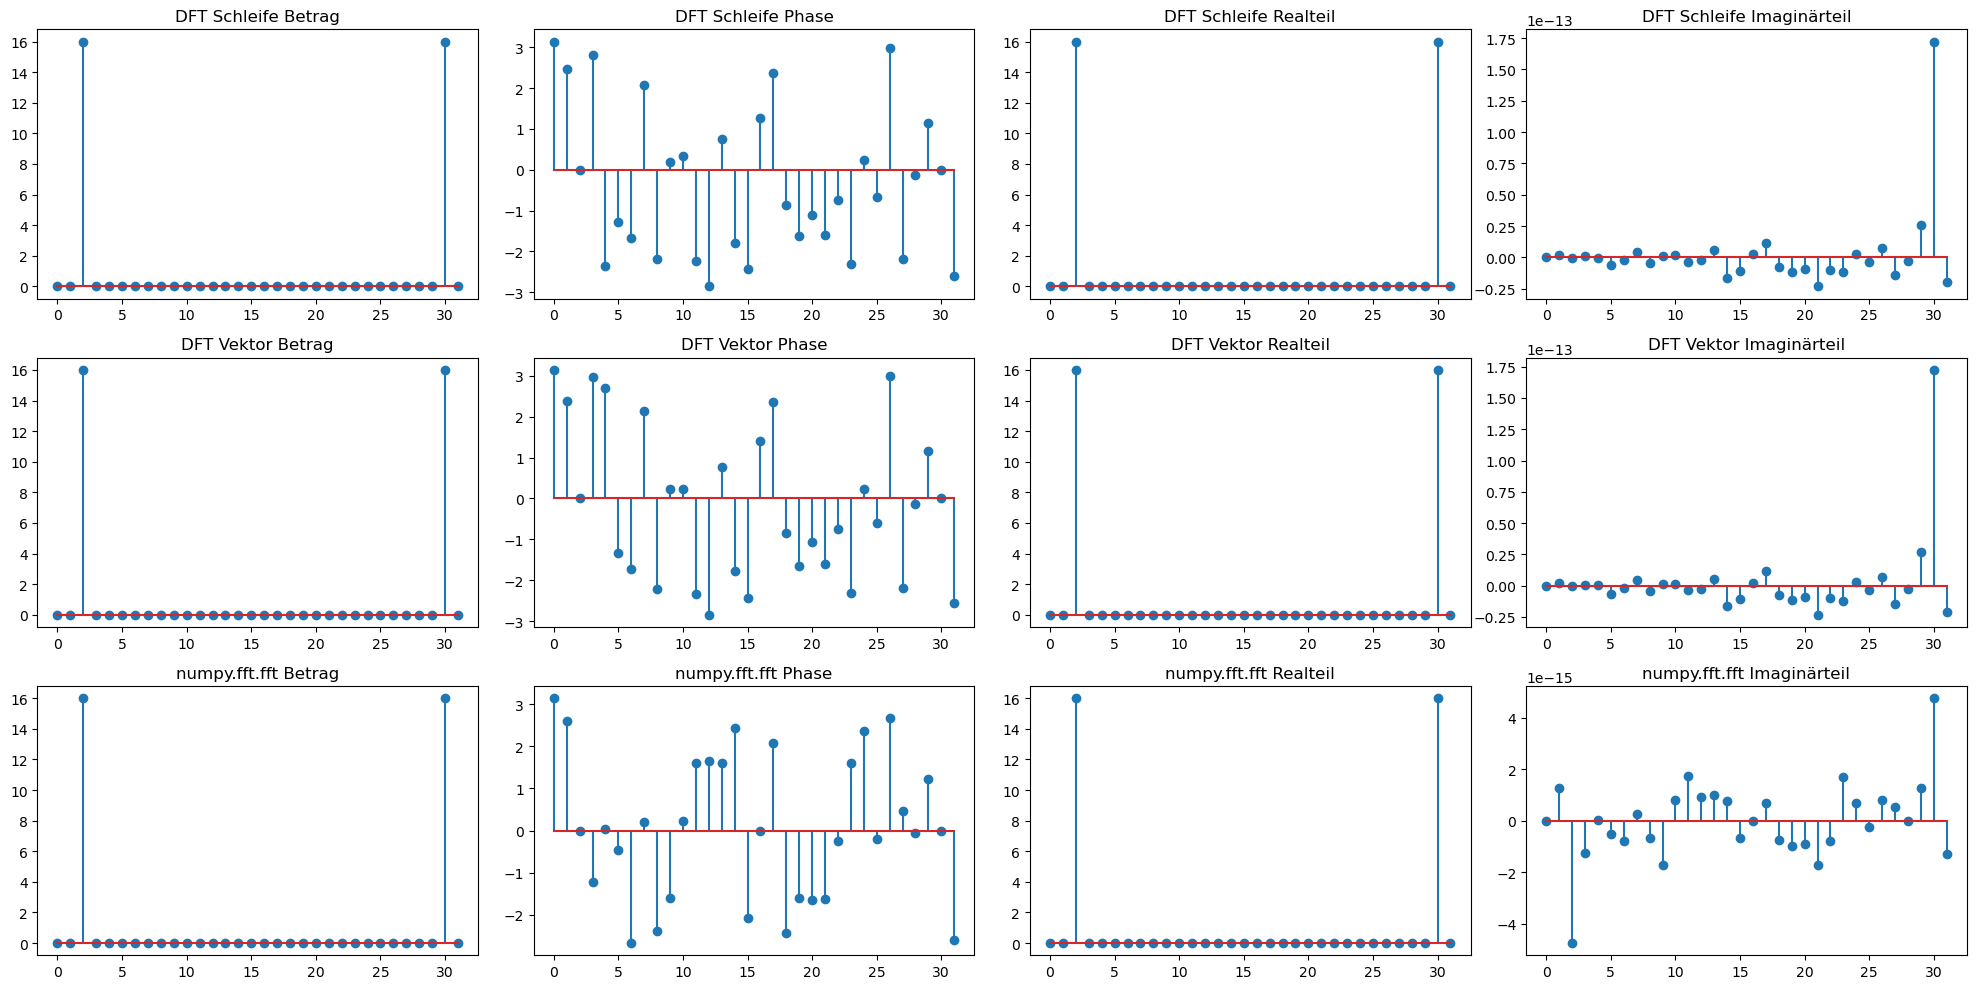

In [74]:
#3er Plot initialisieren
fig, ax = plt.subplots(3, 4, figsize=(20,10))

#dft_schleife Funktionen plotten
print("dft_schleife(cos): ", dft_schleife(cos))     #print der ausgabe von der dft_schleife Funktion
ax[0, 0].stem(np.abs(dft_schleife(cos)))            #plot der Betragsfunktion
ax[0, 0].set_title("DFT Schleife Betrag")
ax[0, 1].stem(np.angle(dft_schleife(cos)))          #plot der Phasenfunktion
ax[0, 1].set_title("DFT Schleife Phase")
ax[0, 2].stem(np.real(dft_schleife(cos)))           #plot der Realteilfunktion
ax[0, 2].set_title("DFT Schleife Realteil")
ax[0, 3].stem(np.imag(dft_schleife(cos)))           #plot der Imaginärteilfunktion
ax[0, 3].set_title("DFT Schleife Imaginärteil")

#dft_vektor Funktionen plotten
print("dft_vektor(cos): ", dft_vektor(cos))         #print der ausgabe von der dft_vektor Funktion
ax[1, 0].stem(np.abs(dft_vektor(cos)))              #plot der Betragsfunktion
ax[1, 0].set_title("DFT Vektor Betrag")
ax[1, 1].stem(np.angle(dft_vektor(cos)))            #plot der Phasenfunktion
ax[1, 1].set_title("DFT Vektor Phase")
ax[1, 2].stem(np.real(dft_vektor(cos)))             #plot der Realteilfunktion
ax[1, 2].set_title("DFT Vektor Realteil")
ax[1, 3].stem(np.imag(dft_vektor(cos)))             #plot der imaginärteilfunktion
ax[1, 3].set_title("DFT Vektor Imaginärteil")

#numpy fft.fft Funktionen plotten
print("numpy.fft.fft(cos): ", np.fft.fft(cos))      #print der ausgabe von der numpy.fft.fft Funktion
ax[2, 0].stem(np.abs(np.fft.fft(cos)))              #plot der Betragsfunktion
ax[2, 0].set_title("numpy.fft.fft Betrag")
ax[2, 1].stem(np.angle(np.fft.fft(cos)))            #plot der Phasenfunktion
ax[2, 1].set_title("numpy.fft.fft Phase")
ax[2, 2].stem(np.real(np.fft.fft(cos)))             #plot der Realteilfunktion
ax[2, 2].set_title("numpy.fft.fft Realteil")
ax[2, 3].stem(np.imag(np.fft.fft(cos)))             #plot der Imaginärteilfunktion    
ax[2, 3].set_title("numpy.fft.fft Imaginärteil")


plt.tight_layout()


Am Vergleich der Ergebnisse kann man sehen, dass Numpy eine andere Implementierung der DFT benutzt als die selbstgeschriebenen Funktionen. Trotzdessen sind bestimmte Punkte trotzdem gleich.

<hr>

### 3. Aufgabe

Testen Sie die Performance Ihrer Implementierungen durch Messung
der Verarbeitungszeit! Vergleichen Sie diese mit der
Verarbeitungszeit der fft aus numpy!


In [75]:
#zeitmessung der dft_schleifen funktion
dft_schleifen_tik = time.time()
dft_schleife(cos)
dft_schleifen_tok = time.time()
print("Die Zeit der dft_schleifen-Funktion beträgt " + str(dft_schleifen_tok-dft_schleifen_tik) + " Sekunden")

#zeitmessung der dft_vektor funktion
dft_vektor_tik = time.time()
dft_vektor(cos)
dft_vektor_tok = time.time()
print("Die Zeit der dft_vektor-Funktion beträgt " + str(dft_vektor_tok-dft_vektor_tik) + " Sekunden")

#zeitmessung der numpy.fft.fft funktion
numpy_tik = time.time()
np.fft.fft(cos)
numpy_tok = time.time()
print("Die Zeit der numpy.fft.fft-Funktion beträgt " + str(numpy_tok-numpy_tik) + " Sekunden")

Die Zeit der dft_schleifen-Funktion beträgt 0.0020089149475097656 Sekunden
Die Zeit der dft_vektor-Funktion beträgt 0.0012662410736083984 Sekunden
Die Zeit der numpy.fft.fft-Funktion beträgt 0.0 Sekunden


## Python-Befehle



Alle relevanten Python-Befehle für diesen Versuch finden Sie im Arbeitsblatt [Numerical Python (numpy)](../../../WuK/numpy/numpy.md) im Moodle.

| mathematische Funktionen aus <code>import numpy as np</code>|<code>exp, real, imag, abs, angle</code>|
| array-Methoden|<code>length, numel, size, reshape</code>|
| Grafik aus <code>import matplotlib as plt</code>|<code>plot, stem, subplot, xlabel, ylabel</code>|

